## Predicting the Winners of Diamond Ranked Matches in League of Legends

This dataset contains statistics for the first 10 minutes of roughly 10,000 diamond ranked matches in the competitive strategy game, League of Legends. I will be attemtpting to build a model that can predict which team will win the match, based on the first 10 minutes of match data. Ranked matches can last anywhere between 20 minutes to over an hour. There are a lot of different factors that can determine who will likely win the match such as kills, amount of gold, average champion level, and vision control of the map.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

matches = pd.read_csv("high_diamond_ranked_10min.csv")

# Dataset Visualisation

In [19]:
matches.shape

(9879, 40)

We have 9879 matches in the dataset, with 40 features.

In [20]:
matches.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [21]:
matches.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

The features include the same statistics for both the Blue team and Red team.

We'll focus on the Blue team for these visualisations. Let's take a look at a few features and see how they relate to the target (blueWins). 

Text(0.5, 51.0, 'Blue Win (0=Loss, 1=Win)')

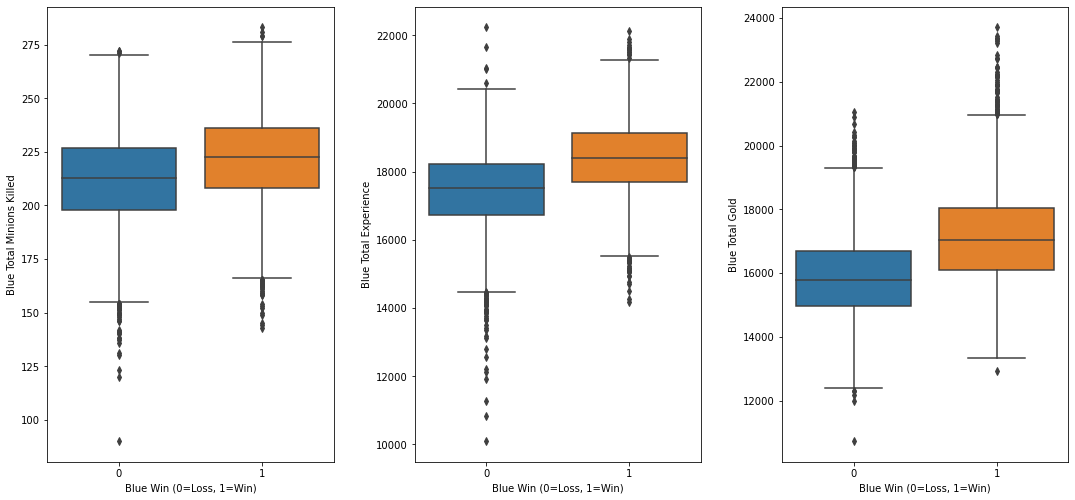

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout(pad=5.0)
sns.boxplot(x="blueWins", y="blueTotalMinionsKilled", data=matches, ax=ax[0])
sns.boxplot(x="blueWins", y="blueTotalExperience", data=matches, ax=ax[1])
sns.boxplot(x="blueWins", y="blueTotalGold", data=matches, ax=ax[2])
ax[0].set_ylabel("Blue Total Minions Killed")
ax[0].set_xlabel("Blue Win (0=Loss, 1=Win)")
ax[1].set_ylabel("Blue Total Experience")
ax[1].set_xlabel("Blue Win (0=Loss, 1=Win)")
ax[2].set_ylabel("Blue Total Gold")
ax[2].set_xlabel("Blue Win (0=Loss, 1=Win)")

From these three boxplots we can see that all three features can be good indicators on whether the Blue team will win or lose. In fact these three features are all related in the game, as killing minions gives the player gold and experience. Therefore the team who has killed more minions will likely have more gold and experience than the other side, and these a vital factors towards being more likely to win the match.

Minions are not the only way of getting gold and experience though. Let's look at some other aspects of the match gameplay that can provide the same thing.

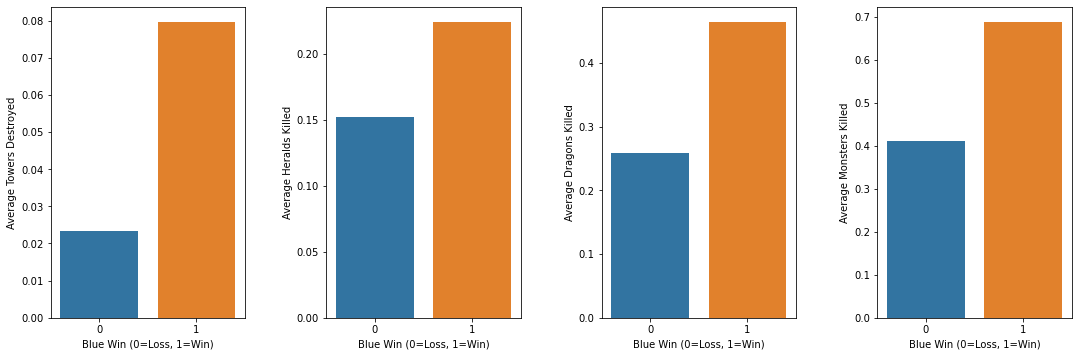

In [23]:
towers = matches.filter(['blueWins', 'blueTowersDestroyed']).groupby(['blueWins']).agg(avg_towers=('blueTowersDestroyed', 'mean'))
heralds = matches.filter(['blueWins', 'blueHeralds']).groupby(['blueWins']).agg(avg_heralds=('blueHeralds', 'mean'))
dragons = matches.filter(['blueWins', 'blueDragons']).groupby(['blueWins']).agg(avg_dragons=('blueDragons', 'mean'))
monsters = matches.filter(['blueWins', 'blueEliteMonsters']).groupby(['blueWins']).agg(avg_monsters=('blueEliteMonsters', 'mean'))

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
fig.tight_layout(pad=5.0)
sns.barplot(x=towers.index, y=towers.avg_towers, ax=ax[0])
sns.barplot(x=heralds.index, y=heralds.avg_heralds, ax=ax[1])
sns.barplot(x=dragons.index, y=dragons.avg_dragons, ax=ax[2])
sns.barplot(x=monsters.index, y=monsters.avg_monsters, ax=ax[3])

y_labels = ['Average Towers Destroyed', 'Average Heralds Killed', 'Average Dragons Killed', 'Average Monsters Killed']
for i in range(4):
    ax[i].set_ylabel(y_labels[i])
    ax[i].set_xlabel("Blue Win (0=Loss, 1=Win)")

Once again, all four of these features are ways of providing gold and experience to the players. Therefore it is clear that destroying more towers/heralds/dragons/monsters gives the Blue team a better chance at winning the match. Destroying more towers appears to be the most significant way of improving your chances at winning, among these four features. 

Let's look at vision control next. This refers to placing wards on the map, which help to spot approaching enemy players faster than a player would see them alone. You can also destroy enemy wards so that they can't continue to watch your movements.

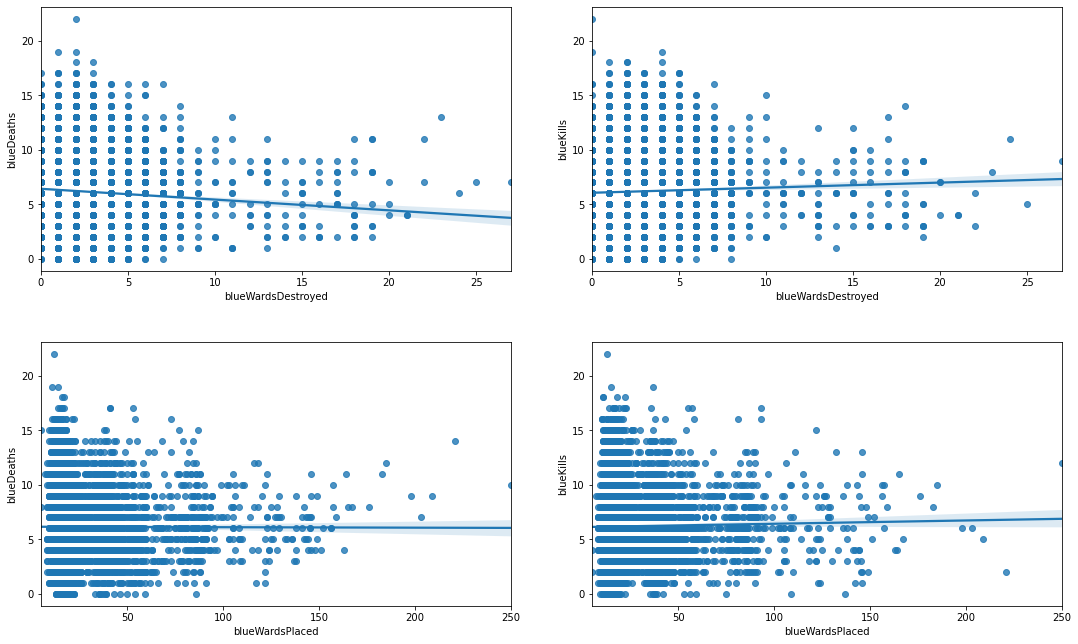

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
fig.tight_layout(pad=5.0)
sns.regplot(x='blueWardsDestroyed', y='blueDeaths', data=matches, ax=ax[0][0])
sns.regplot(x='blueWardsDestroyed', y='blueKills', data=matches, ax=ax[0][1])
sns.regplot(x='blueWardsPlaced', y='blueDeaths', data=matches, ax=ax[1][0])
sns.regplot(x='blueWardsPlaced', y='blueKills', data=matches, ax=ax[1][1])

By looking at these regression plots, it seems that destroying more enemy wards seems to have slighltly more impact on the Blue team's kills and deaths. This is surprising as you would expect the Blue team to suffer less deaths if they place more wards because they can see the enemy coming. But clearly in diamond ranked matches, placing more wards seems to make little difference to the deaths of the Blue team players, yet destroying enemy wards does. 

This could be an indication that diamond ranked players are very efficient at clearing enemy wards, and thus winning is more about disabling the enemy team's vision rather than desperately trying to gain your own.

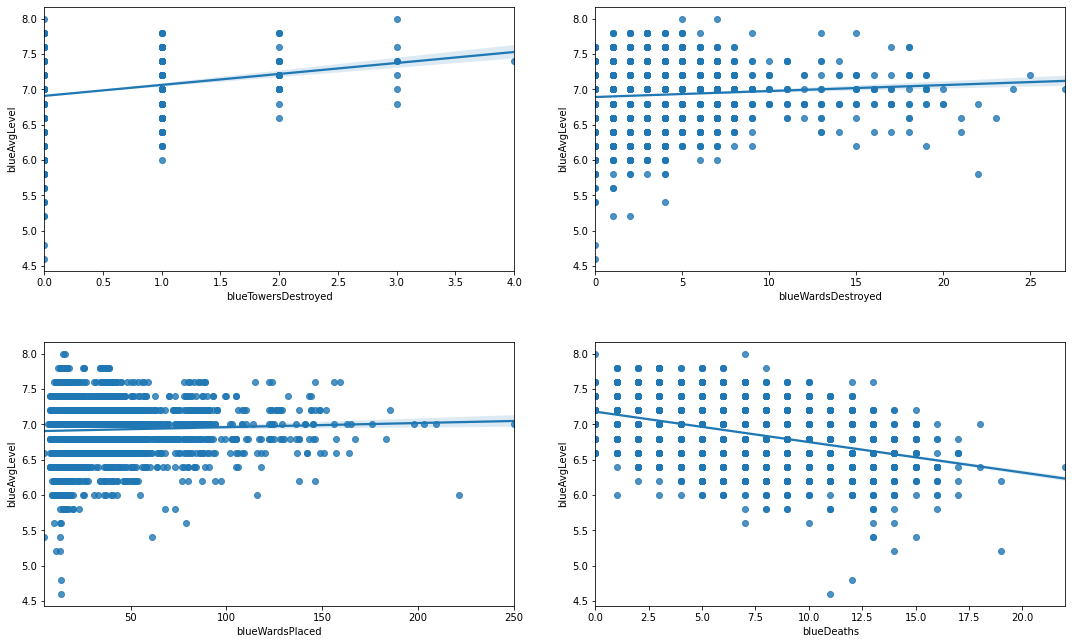

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
fig.tight_layout(pad=5.0)
sns.regplot(x='blueTowersDestroyed', y='blueAvgLevel', data=matches, ax=ax[0][0])
sns.regplot(x='blueWardsDestroyed', y='blueAvgLevel', data=matches, ax=ax[0][1])
sns.regplot(x='blueWardsPlaced', y='blueAvgLevel', data=matches, ax=ax[1][0])
sns.regplot(x='blueDeaths', y='blueAvgLevel', data=matches, ax=ax[1][1])

This time we're looking at how certain features affect the Blue team's average level, using regression plots. 

From this we can see that more deaths for the Blue team clearly correlates to a lower average level. This makes sense as dying too often means you spend less time gaining experience from killing minions, monsters etc.

On the other hand, destroying more enemy towers correlates to a higher average level. Towers do not necessarily give a lot of experience, however this could be an indication that teams with a higher average level have the ability to push the enemy team back more easily and destroy their towers. 

Placing and destroying wards does not seem to have a significant impact on the average level of the Blue team, at least compared to the other two features displayed here.

Text(0.5, 1.0, 'Win/Loss Ratio for Blue Team When Blue Gets First Blood')

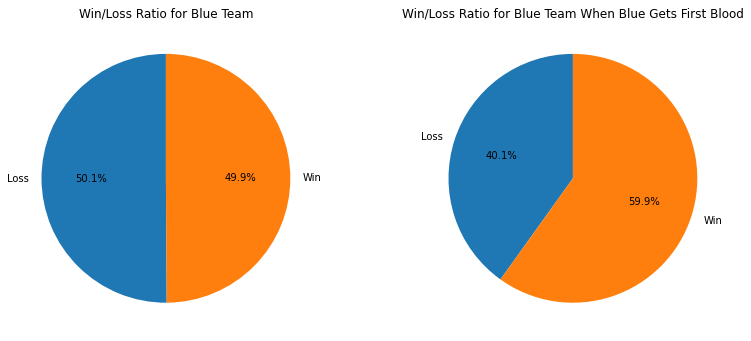

In [26]:
blue_wins = matches.groupby(['blueWins']).size()
blue_wins = blue_wins.rename(index={0: 'Loss', 1: 'Win'})

blue_first_blood = matches[matches.blueFirstBlood == 1].groupby(['blueWins']).size()
blue_first_blood = blue_first_blood.rename(index={0: 'Loss', 1: 'Win'})

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=5.0)
ax[0].pie(blue_wins, labels=list(blue_wins.index), autopct='%1.1f%%', startangle=90)
ax[0].set_title('Win/Loss Ratio for Blue Team')
ax[1].pie(blue_first_blood, labels=list(blue_first_blood.index), autopct='%1.1f%%', startangle=90)
ax[1].set_title('Win/Loss Ratio for Blue Team When Blue Gets First Blood')

Firstly, the pie chart for the Win/Loss ratio of the Blue team for all 9879 matches is interesting. There is some speculation in the League of Legends community that for some psychological reason, you have a better chance of winning whilst being on the Blue team rather than the Red team. However this dataset disproves that theory as the Win/Loss ratio is almost perfectly even for the Blue team. 

The next pie chart looks at the Win/Loss ratio when the Blue team achieves First Blood. This means they were the first team in the match to kill an enemy player. From this pie chart, we can see that getting first blood signigicantly improves your chances of winning the match, with an almost 3:2 ratio, up from 1:1 normally. 

# Prediction Models

This dataset does not require any cleaning, as we can see below that it has no NULL values anywhere.

In [27]:
matches.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [28]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [29]:
matches = matches.set_index("gameId")
matches.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [30]:
X = matches.drop("blueWins", axis=1)
y = matches["blueWins"]

X_train = X[:7000]
y_train = y[:7000]
X_test = X[7000:]
y_test = y[7000:]

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Linear Models 

We'll start by looking at building simple linear models, namely Logistic Regression, Stochastic Gradient Descent Classifier, and Support Vector Classifier. I'll also be using grid search cross-validation to find the best parameters for each model.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

params = {"penalty": ["l1", "l2", "elasticnet", "none"], "C": [1, 0.1, 0.01, 0.001]}

logistic_model = GridSearchCV(LogisticRegression(random_state=1), params, n_jobs=-1)
logistic_model.fit(X_train_sc, y_train)
print("Logistic regression best parameters: {}".format(logistic_model.best_params_))
y_pred = logistic_model.best_estimator_.predict(X_train_sc)
print("Logistic regression Training Accuracy: {}".format(accuracy_score(y_train, y_pred)))
y_pred = logistic_model.best_estimator_.predict(X_test_sc)
print("Logistic regression Test Accuracy: {}\n".format(accuracy_score(y_test, y_pred)))

params = {"C": [1, 0.1, 0.01, 0.001]}

svc_model = GridSearchCV(SVC(random_state=1), params, n_jobs=-1)
svc_model.fit(X_train_sc, y_train)
print("SVC best parameters: {}".format(svc_model.best_params_))
y_pred = svc_model.best_estimator_.predict(X_train_sc)
print("SVC Training Accuracy: {}".format(accuracy_score(y_train, y_pred)))
y_pred = svc_model.best_estimator_.predict(X_test_sc)
print("SVC Test Accuracy: {}\n".format(accuracy_score(y_test, y_pred)))

params = {"loss": ["hinge", "log", "modified_huber"], "penalty": ["l1", "l2", "elasticnet"], "alpha": [0.1, 0.01, 0.001, 0.0001]}

SGD_model = GridSearchCV(SGDClassifier(random_state=1), params, n_jobs=-1)
SGD_model.fit(X_train_sc, y_train)
print("SGD Classifier best parameters: {}".format(SGD_model.best_params_))
y_pred = SGD_model.best_estimator_.predict(X_train_sc)
print("SGD Classifier Training Accuracy: {}".format(accuracy_score(y_train, y_pred)))
y_pred = SGD_model.best_estimator_.predict(X_test_sc)
print("SGD Classifier Test Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Logistic regression best parameters: {'C': 0.1, 'penalty': 'l2'}
Logistic regression Training Accuracy: 0.7314285714285714
Logistic regression Test Accuracy: 0.7346300798888503

SVC best parameters: {'C': 0.1}
SVC Training Accuracy: 0.7385714285714285
SVC Test Accuracy: 0.7325460229246266

SGD Classifier best parameters: {'alpha': 0.1, 'loss': 'modified_huber', 'penalty': 'l1'}
SGD Classifier Training Accuracy: 0.7308571428571429
SGD Classifier Test Accuracy: 0.7356721083709621


The winner here by a very small margin is the SGD classifier. In the best parameters, we can see it chose the modified huber loss function. This function has better tolerance for outliers in the dataset, which tells us that the dataset likely contains a large number of outliers.

## Tree Models

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_sc, y_train)
y_pred = dt.predict(X_train_sc)
print("Decision Tree Training Accuracy: {}".format(accuracy_score(y_train, y_pred)))
y_pred = dt.predict(X_test_sc)
print("Decision Tree Test Accuracy: {}\n".format(accuracy_score(y_test, y_pred)))

params = {"n_estimators": [10, 50, 100, 500]}

rf_gscv = GridSearchCV(RandomForestClassifier(random_state=1), params, n_jobs=-1)
rf_gscv.fit(X_train_sc, y_train)
print("Random Forest best parameters: {}".format(rf_gscv.best_params_))
y_pred = rf_gscv.best_estimator_.predict(X_train_sc)
print("Random Forest Training Accuracy: {}".format(accuracy_score(y_train, y_pred)))
y_pred = rf_gscv.best_estimator_.predict(X_test_sc)
print("Random Forest Test Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.6325112886418895

Random Forest best parameters: {'n_estimators': 500}
Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.7304619659604029


A simple decision tree performed poorly here, whereas the random forest with 500 estimators performed almost as well as the linear models from before. However it's accuracy score still does not beat the best seen so far of 0.73567 with an SGDClassifier.

## Extreme Gradient Boosting (XGB)

In [34]:

from xgboost import XGBClassifier

X_train = X[:6000]
y_train = y[:6000]
X_val = X[6000:7000]
y_val = y[6000:7000]
X_test = X[7000:]
y_test = y[7000:]
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)
X_test_sc = ss.transform(X_test)

best_test_acc = 0
best_params = None

for lr in [0.5, 0.25, 0.1, 0.05, 0.01, 0.001]:
    for esr in [5, 10, 25, 50, 100]:
        #print("Learning rate: {0}, Early stopping rounds: {1}".format(lr, esr))
        xgb = XGBClassifier(n_estimators=1000, learning_rate=lr, random_state=1, n_jobs=-1)
        xgb.fit(X_train_sc, y_train, early_stopping_rounds=esr, eval_set=[(X_val_sc, y_val)], verbose=False)
        y_pred = xgb.predict(X_train_sc)
        #print("XGB Training Accuracy: {}".format(accuracy_score(y_train, y_pred)))
        y_pred = xgb.predict(X_test_sc)
        test_acc = accuracy_score(y_test, y_pred)
        #print("XGB Test Accuracy: {}\n".format(test_acc))
        
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_params = {"lr": lr, "esr": esr}

print("Best Test Accuracy: {0}\nBest Params: {1}".format(best_test_acc, best_params))

Best Test Accuracy: 0.7283779089961793
Best Params: {'lr': 0.01, 'esr': 25}


This result is surprising as the XGBClassifier model has a lower accuracy than all of the linear models and the random forest model from before. The accuracy is only slightly lower at 0.72838 (compared to 0.73567 with an SGDClassifier). However xgboost models are usually very powerful and I expected it to perform better than the previous models here. However, the datatset is clearly well structured enough that a simple linear model like Logistic Regression is enough to provide a good accuracy.

## Conclusion

So from all the models I've built, the best model is an SGDClassifier, with a test accuracy score of 0.73567. An accuracy of ~74% may not sound great, however as I stated in the introduction, ranked matches are very hard to predict in League of Legends, as there are a lot of factors that can cause the tides to turn, allowing the underdog team to suddenly bounce back and win. 

As usual, a larger dataset of matches may allow me to improve this accuracy further. It could also be possible to experiment with using deep learning models (i.e. a neural network) to further improve the accuracy.